In [192]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [193]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from typing import Annotated, List
from langgraph.graph import StateGraph

In [194]:
class BatsmanState(TypedDict):
    runs : int 
    balls : int
    fours: int
    sixes : int 
    #These we will Calculate
    sr : float 
    bpb: float 
    boundary_percent : float
    summary:str

In [195]:
def calculate_sr(state : BatsmanState):
    sr = (state['runs']/state['balls'])/100
    return {'sr':sr}

In [196]:
def calculate_bpb(state : BatsmanState):
    #Balls per Boundary
    bpb = (state['balls'] / (state['fours'] + state['sixes']))
    state['bpb'] = bpb
    return state


In [197]:
def calculate_boundary_percent(state:BatsmanState):
    #Boundary Percent Calculate it
    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    return {'boundary_percent': boundary_percent}

In [198]:
def summary(state: BatsmanState):

    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""
    
    return {'summary': summary}

In [199]:
##Start the Workflow
graph = StateGraph(BatsmanState)
###Add the Nodes
graph.add_node("calculate_sr",calculate_sr)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("calculate_boundary_percent",calculate_boundary_percent)
graph.add_node("summary_node",summary_node)
##Add the Edges
graph.add_edge(START,"calculate_sr")
graph.add_edge(START,"calculate_bpb")
graph.add_edge(START,"calculate_boundary_percent")

graph.add_edge('calculate_sr','summary_node')
graph.add_edge('calculate_bpb','summary_node')
graph.add_edge('calculate_boundary_percent','summary_node')
graph.add_edge('summary_node',END)

workflow = graph.compile()

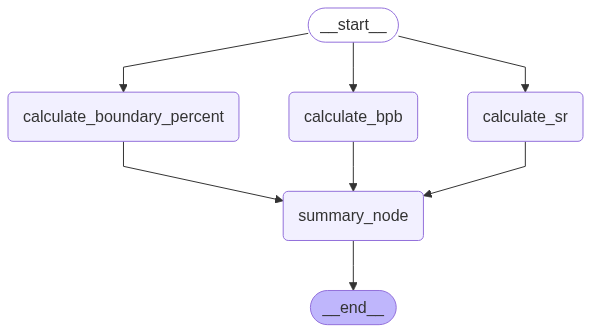

In [200]:
from IPython.display import Image, display

try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
initial_state = {
    'runs': 100,   
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 0.02,
 'bpb': 5.0,
 'boundary_percent': 48.0,
 'summary': '\nStrike Rate - 0.02 \n\nBalls per boundary - 5.0 \n\nBoundary percent - 48.0\n'}

| Scenario                               | Should `'runs'` be a list? | Why                                          |
| -------------------------------------- | -------------------------- | -------------------------------------------- |
| Multiple nodes **writing to** `'runs'` | ✅ Yes                      | Prevents concurrent update error             |
| Only reading from `'runs'` (your case) | ❌ No                       | No concurrent write, so single value is fine |
